In [4]:
import pandas as pd
import matplotlib.pyplot as plt

### Load the data

In [ ]:
# Load the dataset
df = pd.read_csv('data/ner_dataset.csv', encoding='latin1')
df = df.drop(['POS'], axis=1)
df = df.fillna(method='ffill')
df.head()

,Sentence #,Word,Tag
0,Sentence: 1,Thousands,O
1,Sentence: 1,of,O
2,Sentence: 1,demonstrators,O
3,Sentence: 1,have,O
4,Sentence: 1,marched,O


### Data Preprocessing

In [7]:
# Group by sentences
sentences = df.groupby('Sentence #').apply(lambda s: [(w, t) for w, t in zip(s['Word'].values.tolist(), s['Tag'].values.tolist())]).tolist()
sentences

[[('Thousands', 'O'),
  ('of', 'O'),
  ('demonstrators', 'O'),
  ('have', 'O'),
  ('marched', 'O'),
  ('through', 'O'),
  ('London', 'B-geo'),
  ('to', 'O'),
  ('protest', 'O'),
  ('the', 'O'),
  ('war', 'O'),
  ('in', 'O'),
  ('Iraq', 'B-geo'),
  ('and', 'O'),
  ('demand', 'O'),
  ('the', 'O'),
  ('withdrawal', 'O'),
  ('of', 'O'),
  ('British', 'B-gpe'),
  ('troops', 'O'),
  ('from', 'O'),
  ('that', 'O'),
  ('country', 'O'),
  ('.', 'O')],
 [('Iranian', 'B-gpe'),
  ('officials', 'O'),
  ('say', 'O'),
  ('they', 'O'),
  ('expect', 'O'),
  ('to', 'O'),
  ('get', 'O'),
  ('access', 'O'),
  ('to', 'O'),
  ('sealed', 'O'),
  ('sensitive', 'O'),
  ('parts', 'O'),
  ('of', 'O'),
  ('the', 'O'),
  ('plant', 'O'),
  ('Wednesday', 'B-tim'),
  (',', 'O'),
  ('after', 'O'),
  ('an', 'O'),
  ('IAEA', 'B-org'),
  ('surveillance', 'O'),
  ('system', 'O'),
  ('begins', 'O'),
  ('functioning', 'O'),
  ('.', 'O')],
 [('Helicopter', 'O'),
  ('gunships', 'O'),
  ('Saturday', 'B-tim'),
  ('pounded', 'O'

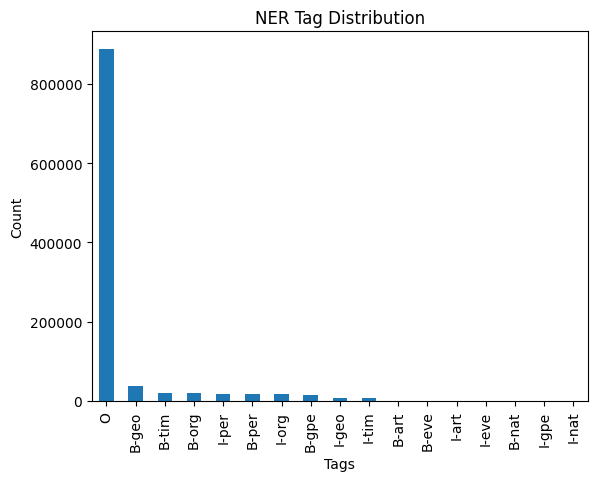

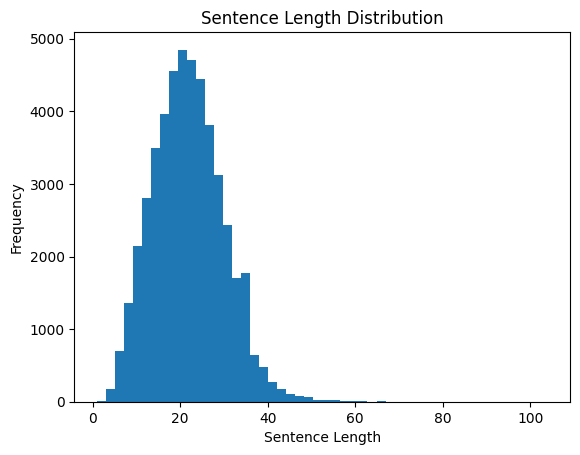

In [ ]:
# Bar Chart for NER Tag Distribution
tag_counts = df['Tag'].value_counts()
tag_counts.plot(kind='bar')
plt.title('NER Tag Distribution')
plt.xlabel('Tags')
plt.ylabel('Count')
plt.show()

# Histogram for Sentence Length Distribution
sentence_lengths = df.groupby('Sentence #')['Word'].count()
sentence_lengths.plot(kind='hist', bins=50)
plt.title('Sentence Length Distribution')
plt.xlabel('Sentence Length')
plt.ylabel('Frequency')
plt.show()


In [ ]:
# !pip install sklearn_crfsuite

### Model 1

In [ ]:
from sklearn_crfsuite import CRF
from sklearn.model_selection import train_test_split
from sklearn_crfsuite.metrics import flat_classification_report

# Feature Extraction Function
def word2features(sent, i):
    word = sent[i][0]
    features = {
        'word': word,
        'is_first': i == 0,
        'is_last': i == len(sent) - 1,
        'is_capitalized': word[0].upper() == word[0],
        'is_all_caps': word.upper() == word,
        'is_all_lower': word.lower() == word,
        'prefix-1': word[0],
        'suffix-1': word[-1],
    }
    return features

X = [[word2features(s, i) for i in range(len(s))] for s in sentences]
y = [[label for _, label in s] for s in sentences]

# Train-test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Model Training
crf = CRF(algorithm='lbfgs', max_iterations=100)
crf.fit(X_train, y_train)

# Evaluation
y_pred = crf.predict(X_val)
print(flat_classification_report(y_val, y_pred))


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 5.4 MB/s eta 0:00:00
              precision    recall  f1-score   support

       B-art       0.33      0.01      0.02        94
       B-eve       0.75      0.39      0.51        70
       B-geo       0.81      0.88      0.84      7558
       B-gpe       0.94      0.88      0.91      3142
       B-nat       0.27      0.17      0.21        40
       B-org       0.78      0.64      0.71      4151
       B-per       0.78      0.71      0.74      3400
       B-tim       0.92      0.76      0.83      4077
       I-art       0.25      0.05      0.08        84
       I-eve       0.66      0.32      0.43        65
       I-geo       0.79      0.69      0.74      1462
       I-gpe       0.86      0.55      0.67        33
       I-nat       0.26      0.54      0.35        13
       I-org       0.72      0.76      0.74      3394
       I-per       0.77      0.88      0.82      3406
       I-tim       0.77      0.69      0.73      1251
   

In [ ]:
from sklearn_crfsuite.metrics import flat_classification_report

# Evaluate the CRF model
y_pred = crf.predict(X_val)
report = flat_classification_report(y_val, y_pred)
print(report)


              precision    recall  f1-score   support

       B-art       0.33      0.01      0.02        94
       B-eve       0.75      0.39      0.51        70
       B-geo       0.81      0.88      0.84      7558
       B-gpe       0.94      0.88      0.91      3142
       B-nat       0.27      0.17      0.21        40
       B-org       0.78      0.64      0.71      4151
       B-per       0.78      0.71      0.74      3400
       B-tim       0.92      0.76      0.83      4077
       I-art       0.25      0.05      0.08        84
       I-eve       0.66      0.32      0.43        65
       I-geo       0.79      0.69      0.74      1462
       I-gpe       0.86      0.55      0.67        33
       I-nat       0.26      0.54      0.35        13
       I-org       0.72      0.76      0.74      3394
       I-per       0.77      0.88      0.82      3406
       I-tim       0.77      0.69      0.73      1251
           O       0.98      0.99      0.99    177590

    accuracy              

In [ ]:
# Preparing DataFrame
results = []
for words, true_labels, pred_labels in zip(words_test, y_test, y_pred):
    for word, true_label, pred_label in zip(words, true_labels, pred_labels):
        results.append((word, true_label, pred_label))

df_results = pd.DataFrame(results, columns=['Word', 'True_Tag', 'Predicted_Tag'])
df_results


,Word,True_Tag,Predicted_Tag
0,The,O,O
1,report,O,O
2,calls,O,O
3,on,O,O
4,President,B-per,B-per
...,...,...,...
209825,doors,O,O
209826,late,O,O
209827,Friday,B-tim,B-tim
209828,night,I-tim,I-tim


## Model 2

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import LSTM, Embedding, Dense, TimeDistributed, Dropout, Bidirectional, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from transformers import BertTokenizer, TFBertModel
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Input, Dropout, TimeDistributed, Dense
from transformers import BertTokenizer, TFBertForTokenClassification
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Model

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load dataset
df = pd.read_csv('ner_dataset.csv', encoding='latin1')

# Fill missing values in 'Sentence #' column
df['Sentence #'].fillna(method='ffill', inplace=True)

# Drop POS column as it is not required
df.drop(columns=['POS'], inplace=True)

# Check and handle NaN values in 'Word' column
df['Word'].fillna('', inplace=True)  # Replace NaN with an empty string or another appropriate placeholder

# Check the structure of the dataset
df.head()

,Sentence #,Word,Tag
0,Sentence: 1,Thousands,O
1,Sentence: 1,of,O
2,Sentence: 1,demonstrators,O
3,Sentence: 1,have,O
4,Sentence: 1,marched,O


In [10]:
sentences = df.groupby('Sentence #')['Word'].apply(list).values
ner_tags = df.groupby('Sentence #')['Tag'].apply(list).values

### Train-Test Split

In [11]:
train_sentences, test_sentences, train_tags, test_tags = train_test_split(sentences, ner_tags, test_size=0.2, random_state=42)
train_sentences, val_sentences, train_tags, val_tags = train_test_split(train_sentences, train_tags, test_size=0.1, random_state=42)

print(f"Number of training samples: {len(train_sentences)}")
print(f"Number of validation samples: {len(val_sentences)}")
print(f"Number of test samples: {len(test_sentences)}")
train_sentences

Number of training samples: 34530
Number of validation samples: 3837
Number of test samples: 9592


array([list(['U.S.', 'military', 'lawyers', 'want', 'charges', 'dropped', 'against', 'alleged', 'conspirators', 'in', 'the', 'September', '2001', 'terrorist', 'attacks', 'on', 'the', 'United', 'States', ',', 'saying', 'their', 'cases', 'were', 'improperly', 'influenced', 'by', 'a', 'Pentagon', 'adviser', '.']),
       list(['Ecuador', 'produces', 'more', 'than', '5,00,000', 'barrels', 'of', 'crude', 'oil', 'a', 'day', ',', 'making', 'it', 'the', 'fifth', 'largest', 'producer', 'in', 'South', 'America', '.']),
       list(['He', 'urged', 'the', 'Palestinian', 'leadership', 'to', 'end', 'the', 'demonizing', 'of', 'Israel', 'and', 'Jews', ',', 'which', 'he', 'called', '"', 'the', 'root', 'cause', 'of', 'suicide', 'bombings', 'and', 'terrorism', '.', '"']),
       ...,
       list(['The', 'Trees', 'were', 'good-natured', 'and', 'gave', 'him', 'one', 'of', 'their', 'branches', '.']),
       list(['He', 'said', 'Hutu', 'rebels', 'in', 'Congo', 'are', 'massing', 'near', 'the', 'border', 'with

In [12]:
train_tags

array([list(['B-geo', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-tim', 'I-tim', 'O', 'O', 'O', 'O', 'B-geo', 'I-geo', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-org', 'O', 'O']),
       list(['B-geo', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-geo', 'I-geo', 'O']),
       list(['O', 'O', 'O', 'B-gpe', 'O', 'O', 'O', 'O', 'O', 'O', 'B-geo', 'O', 'B-geo', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']),
       ...,
       list(['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']),
       list(['O', 'O', 'B-org', 'O', 'O', 'B-geo', 'O', 'O', 'O', 'O', 'O', 'O', 'B-geo', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-gpe', 'O', 'O']),
       list(['B-per', 'I-per', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O'])],
      dtype=object)

### Preprocessing

In [13]:
# Create a vocabulary and tag index
words = list(set(df['Word'].values))
words.append('ENDPAD')
words

['',
 'cowards',
 '57',
 'anxious',
 'multi-cultural',
 'raping',
 'Earnings',
 'Carnegie',
 'skulked',
 'Interpol',
 'Rivalry',
 '57-member',
 'Marino',
 'abbreviations',
 '9.08',
 'split',
 'win',
 'internationally-backed',
 'U.N.-led',
 'decay',
 'large-caliber',
 'standstill',
 'Yasir',
 'Eid-al-Fitr',
 'wiped',
 'six-day',
 'depreciate',
 '1,09,000',
 'competes',
 'Qaddumi',
 'bother',
 'champ',
 'Daglas',
 'multiple-use',
 'omen',
 'dispenser',
 'dominating',
 'Mokhine',
 'aviaries',
 'pornography',
 'overruled',
 'archbishop',
 'Mottaki',
 'Contract',
 'Zamir',
 'escorted',
 'Yuanshi',
 'Dostum',
 'minimized',
 'constitutional',
 'Mohean',
 'U.S.-brokered',
 'cave-ins',
 'palm',
 'took',
 'results',
 'safeguarding',
 'Zaraqawi',
 'aiding',
 'faint',
 'Lateef',
 'defused',
 'cease-fires',
 'Musa',
 'installations',
 'din',
 'disadvantages',
 'notice',
 'eliminate',
 'counter-proliferation',
 '9-percent',
 'al-Bared',
 'Maurits',
 'utilization',
 '1,20,000',
 'Euphausia',
 'Matti'

In [14]:
tags = list(set(df['Tag'].values))
tags


['B-per',
 'I-art',
 'I-eve',
 'I-geo',
 'B-art',
 'I-nat',
 'B-nat',
 'B-tim',
 'B-gpe',
 'I-per',
 'B-org',
 'I-org',
 'B-eve',
 'I-gpe',
 'O',
 'I-tim',
 'B-geo']

In [15]:
word2idx = {w: i + 1 for i, w in enumerate(words)}
tag2idx = {t: i for i, t in enumerate(tags)}
tag2idx

{'B-per': 0,
 'I-art': 1,
 'I-eve': 2,
 'I-geo': 3,
 'B-art': 4,
 'I-nat': 5,
 'B-nat': 6,
 'B-tim': 7,
 'B-gpe': 8,
 'I-per': 9,
 'B-org': 10,
 'I-org': 11,
 'B-eve': 12,
 'I-gpe': 13,
 'O': 14,
 'I-tim': 15,
 'B-geo': 16}

In [16]:
# Prepare sequences
max_len = 50

X_train = [[word2idx[w] for w in s] for s in train_sentences]
X_train = pad_sequences(maxlen=max_len, sequences=X_train, padding="post", value=word2idx['ENDPAD'])

y_train = [[tag2idx[t] for t in s] for s in train_tags]
y_train = pad_sequences(maxlen=max_len, sequences=y_train, padding="post", value=tag2idx["O"])
y_train = [to_categorical(i, num_classes=len(tags)) for i in y_train]

X_val = [[word2idx[w] for w in s] for s in val_sentences]
X_val = pad_sequences(maxlen=max_len, sequences=X_val, padding="post", value=word2idx['ENDPAD'])

y_val = [[tag2idx[t] for t in s] for s in val_tags]
y_val = pad_sequences(maxlen=max_len, sequences=y_val, padding="post", value=tag2idx["O"])
y_val = [to_categorical(i, num_classes=len(tags)) for i in y_val]

X_test = [[word2idx[w] for w in s] for s in test_sentences]
X_test = pad_sequences(maxlen=max_len, sequences=X_test, padding="post", value=word2idx['ENDPAD'])

y_test = [[tag2idx[t] for t in s] for s in test_tags]
y_test = pad_sequences(maxlen=max_len, sequences=y_test, padding="post", value=tag2idx["O"])
y_test = [to_categorical(i, num_classes=len(tags)) for i in y_test]
X_train

array([[29383, 17987, 29762, ..., 35172, 35172, 35172],
       [26026, 11133,   448, ..., 35172, 35172, 35172],
       [26338,  2133, 11871, ..., 35172, 35172, 35172],
       ...,
       [11558,  5624, 22047, ..., 35172, 35172, 35172],
       [26338, 24979,   291, ..., 35172, 35172, 35172],
       [ 4960, 23326, 21947, ..., 35172, 35172, 35172]], dtype=int32)

### Modeling

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Embedding, Dense, TimeDistributed, Dropout, Bidirectional

model = Sequential()
model.add(Embedding(input_dim=len(words) + 1, output_dim=50, input_length=max_len))
model.add(Bidirectional(LSTM(units=100, return_sequences=True, recurrent_dropout=0.1)))
model.add(TimeDistributed(Dense(len(tags), activation="softmax")))

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

history = model.fit(X_train, np.array(y_train), batch_size=64, epochs=10, validation_data=(X_val, np.array(y_val)), verbose=1)


Epoch 1/10
540/540 [==============================] - 140s 251ms/step - loss: 0.2676 - accuracy: 0.9432 - val_loss: 0.1130 - val_accuracy: 0.9686
Epoch 2/10
540/540 [==============================] - 135s 251ms/step - loss: 0.0736 - accuracy: 0.9794 - val_loss: 0.0605 - val_accuracy: 0.9822
Epoch 3/10
540/540 [==============================] - 136s 251ms/step - loss: 0.0449 - accuracy: 0.9868 - val_loss: 0.0534 - val_accuracy: 0.9841
Epoch 4/10
540/540 [==============================] - 134s 248ms/step - loss: 0.0352 - accuracy: 0.9893 - val_loss: 0.0516 - val_accuracy: 0.9846
Epoch 5/10
540/540 [==============================] - 132s 244ms/step - loss: 0.0294 - accuracy: 0.9908 - val_loss: 0.0519 - val_accuracy: 0.9848
Epoch 6/10
540/540 [==============================] - 136s 252ms/step - loss: 0.0254 - accuracy: 0.9919 - val_loss: 0.0532 - val_accuracy: 0.9849
Epoch 7/10
540/540 [==============================] - 133s 247ms/step - loss: 0.0220 - accuracy: 0.9930 - val_loss: 0.0561 -

### Evaluate the model

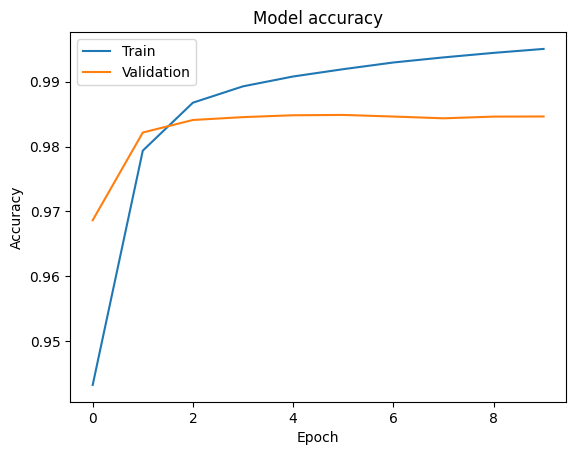

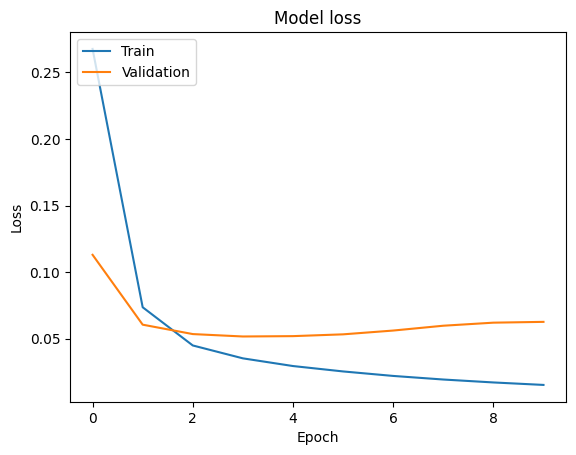

In [18]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [1]:
# Future Scope:
# Data Augmentation: Increase training data using data augmentation techniques.
# Transfer Learning: Use more advanced transformer models like Bert, Transformer,RoBERTa, GPT-3, etc.
# Hyperparameter Tuning: Optimize model parameters using techniques like Grid Search or Bayesian Optimization.
# Model Ensembling: Combine predictions from multiple models to improve performance.
# Cross-Lingual NER: Extend the model to work with multiple languages using multi-lingual BERT models.